## Name: Jose Aries E. De Los Santos
## Image Compression with Singular Value Decomposition

In [69]:
##Import the necessary libraries and modules to be used
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd

In [70]:
Img = cv2.imread('road.jpg', cv2.IMREAD_COLOR);  # BGR format
print(Img.shape)

(3000, 4000, 3)


In [71]:
B = Img[:,:,0];
G = Img[:,:,1];
R = Img[:,:,2];

U1,S1,Vh1 = np.linalg.svd(B)
U2,S2,Vh2 = np.linalg.svd(G)
U3,S3,Vh3 = np.linalg.svd(R)


## 1. For each intensity matrix (channel), take its singular value decomposition and plot the singular values and corresponding image variance.

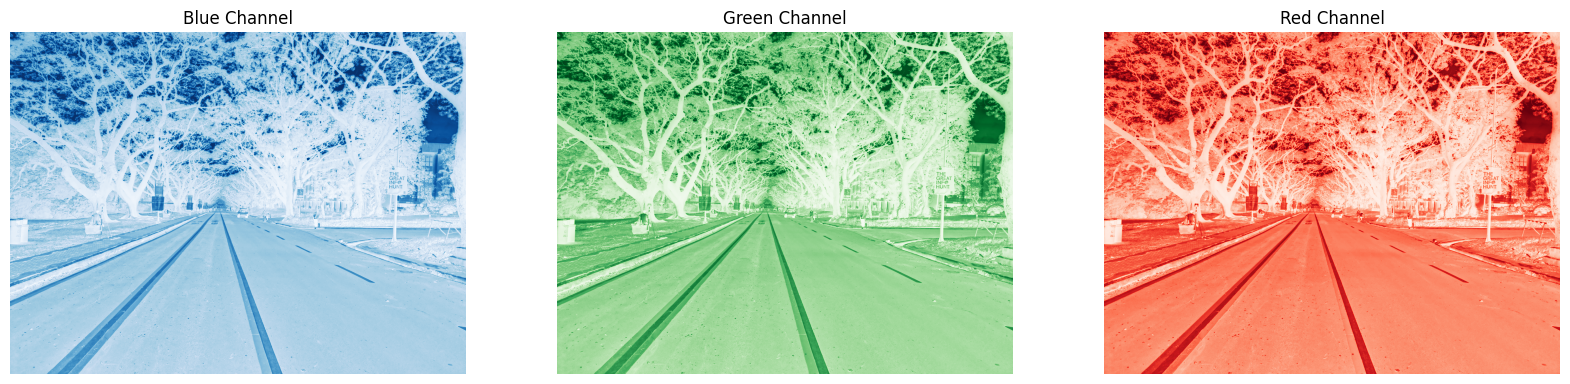

In [10]:
# Subplots for the color channels
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Display the approximated color channels in subplots
axes[0].imshow(B, cmap='Blues')
axes[0].set_title('Blue Channel')
axes[0].axis('off')

axes[1].imshow(G, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(R, cmap='Reds')
axes[2].set_title('Red Channel')
axes[2].axis('off')

plt.show()

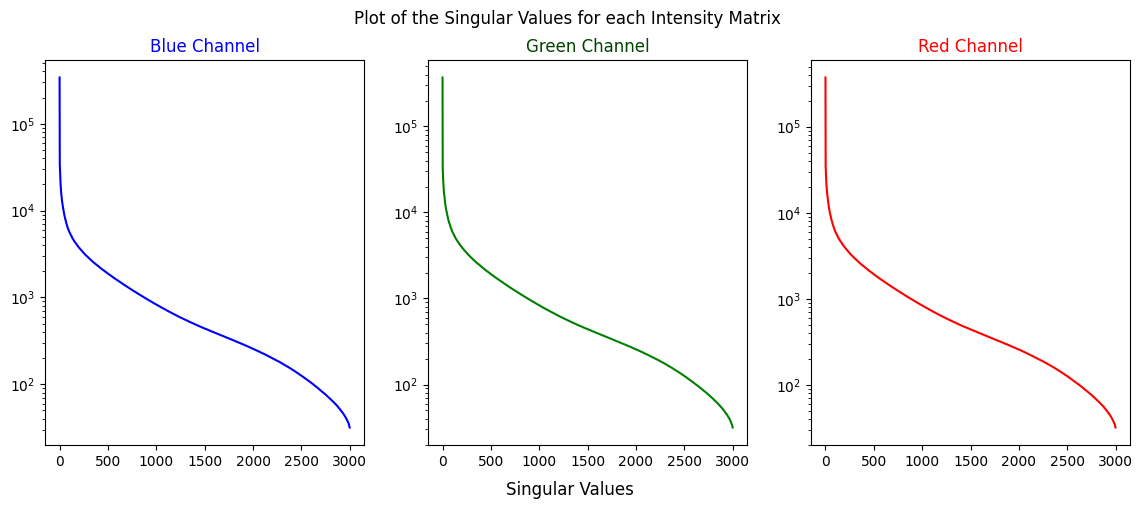

In [47]:
#Plotting of Singular values in logarithmic scale

fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].plot(S1,"b-")
ax[0].semilogy()
ax[0].set_title("Blue Channel",color="#0000ff")
ax[1].plot(S2,"g-")
ax[1].set_title("Green Channel",color="#004400")
ax[1].semilogy()
ax[2].plot(S3,"r-")
ax[2].set_title("Red Channel",color="#ff0000")
ax[2].semilogy()

fig.suptitle("Plot of the Singular Values for each Intensity Matrix \n", fontsize=12)
fig.text(0.5, 0.02, 'Singular Values', ha='center', va='center', fontsize=12)

plt.show()

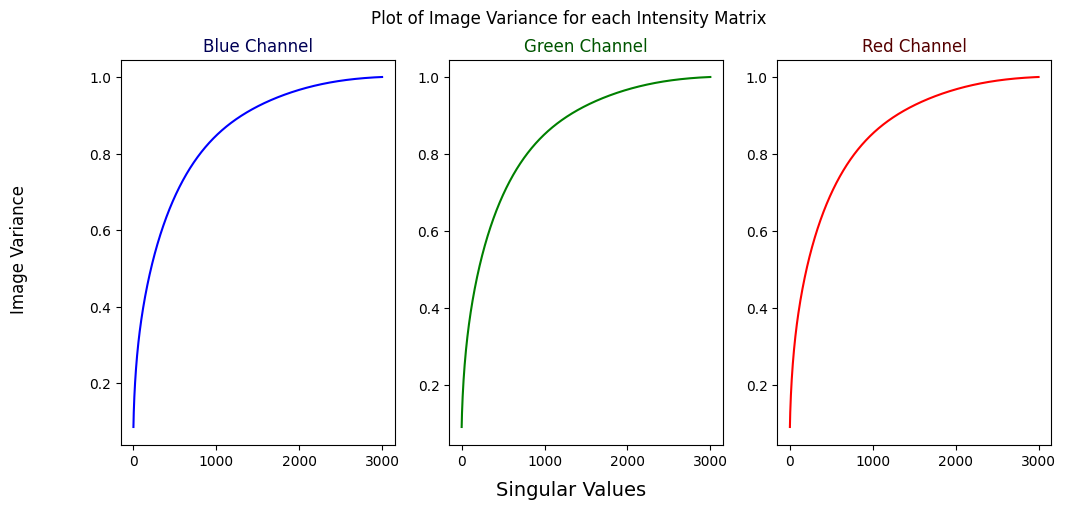

In [48]:
## Plotting the Corresponding Image Variance of each Intensity Matrix

ImgVar1 = np.cumsum(S1)/np.sum(S1)
ImgVar2 = np.cumsum(S2)/np.sum(S2)
ImgVar3 = np.cumsum(S3)/np.sum(S3)

fig, ax1 = plt.subplots(1, 3, figsize=(12, 5))

ax1[0].plot(ImgVar1,"b-")
ax1[0].set_title("Blue Channel", color="#000055")
ax1[1].plot(ImgVar2,"g-")
ax1[1].set_title("Green Channel", color="#005500")
ax1[2].plot(ImgVar3,"r-")
ax1[2].set_title("Red Channel", color="#550000")

fig.suptitle("Plot of Image Variance for each Intensity Matrix \n", fontsize=12)
fig.text(0.5, 0.02, 'Singular Values', ha='center', va='center', fontsize=14)
fig.text(0.04, 0.5, 'Image Variance', ha='center', va='center', rotation='vertical', fontsize=12)

plt.show()

## 2. Write a code that determines the lowest possible $p$ so that all truncated SVDs yield at least 85% image variance in all color channels. Plot the corresponding compressed colored image.

In [75]:
# Initialize the variance threshold (0.85 for 85%)
threshold = 0.85; #Set the value for threshold
ImgVar = [ImgVar1, ImgVar2, ImgVar3]; ##Store the Image Variance for each color channel
p = [0,0,0]; ##store the values of p when the threshold for the image variance is reached
for i in range(len(ImgVar)):
  k = 0
  while ImgVar[i][k] <= threshold:
    k = k + 1
    p[i] = k
print("The lowest possible value of p for each intensity matrix that yields atleast 85% if the image variance:  \n p = ",p)


##Alternative for the code shown above
# optimal_p = [0,0,0];
# for j in range(3):
#   U,S,Vh = np.linalg.svd(Img[:,:,j])
#   ImgVar = np.cumsum(S)/np.sum(S)
#   p0 = 0
#   while ImgVar[p0] <= threshold:
#     p0 = p0 + 1
#     optimal_p[j] = p0

The lowest possible value of p for each intensity matrix that yields atleast 85% if the image variance:  
 p =  [1013, 994, 984]


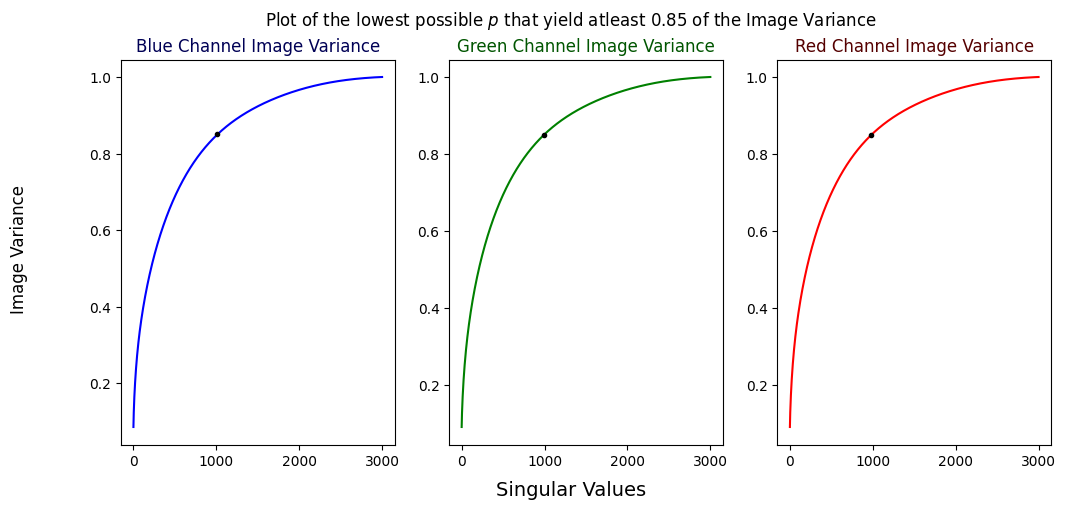

In [77]:
fig, ax1 = plt.subplots(1, 3, figsize=(12, 5))

ax1[0].plot(ImgVar1,"b-")
ax1[0].set_title("Blue Channel Image Variance", color="#000055")
ax1[0].plot(p[0],ImgVar1[p[0]],"k.")
ax1[1].plot(ImgVar2,"g-")
ax1[1].set_title("Green Channel Image Variance", color="#005500")
ax1[1].plot(p[1],ImgVar2[p[1]],"k.")
ax1[2].plot(ImgVar3,"r-")
ax1[2].set_title("Red Channel Image Variance", color="#550000")
ax1[2].plot(p[2],ImgVar3[p[2]],"k.")


fig.suptitle("Plot of the lowest possible $p$ that yield atleast 0.85 of the Image Variance \n", fontsize=12)
fig.text(0.5, 0.02, 'Singular Values', ha='center', va='center', fontsize=14)
fig.text(0.04, 0.5, 'Image Variance', ha='center', va='center', rotation='vertical', fontsize=12)


plt.show()

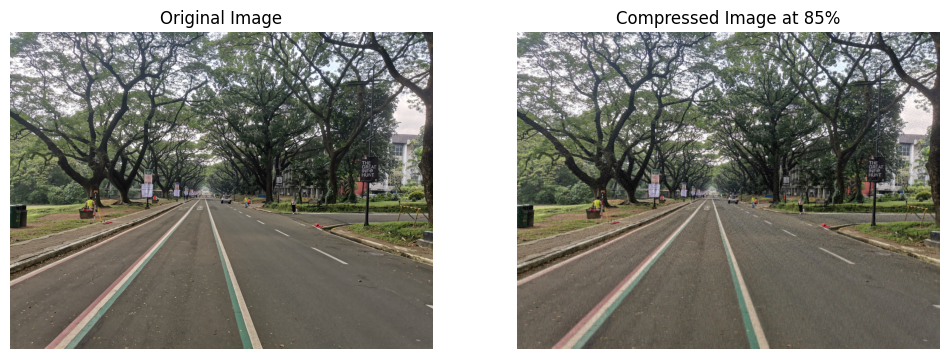

In [60]:
## Acquire all the truncated SVD's for each Intensity Matrix of for the lowest possible p that yields atleast 85% of the Image Variance
## Convert the approximated color channels to 8-bit unsigned integer (CV_8U)
ApproxImg1 = cv2.convertScaleAbs((U1[:,0:p[0]] * S1[0:p[0]]) @ Vh1[0:p[0],:]);
ApproxImg2 = cv2.convertScaleAbs((U2[:,0:p[1]] * S2[0:p[1]]) @ Vh2[0:p[1],:]);
ApproxImg3 = cv2.convertScaleAbs((U3[:,0:p[2]] * S3[0:p[2]]) @ Vh3[0:p[2],:]);

## Compress the color channels into one image
compressed_img = cv2.merge((ApproxImg1, ApproxImg2, ApproxImg3))

## Display the original and compressed image
fig, newax = plt.subplots(1, 2, figsize=(12, 5))
newax[0].imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
newax[0].set_title("Original Image")
newax[0].axis('off')
newax[1].imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
newax[1].set_title("Compressed Image at 85%")
newax[1].axis('off')
plt.show()

In [67]:
# Export the compressed image to a file
output_file = 'compressed_image.jpg'  # Specify the file name and format
cv2.imwrite(output_file, compressed_img)

True